# **Kelompok 8 Analisis Sentimen pada Produk**
: Metode Naive Bayes
1.   Alin
2.   Susi
3.   Michael
> Sumber Data : https://github.com/chlaudiah/Sentiment-Classification-FD-Reviews/blob/master/dataset.csv

# **Preprosssing**

**Persiapan Library**

In [1]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   --- ------------------------------------ 2.4/24.0 MB 14.9 MB/s eta 0:00:02
   ---------- ----------------------------- 6.3/24.0 MB 17.5 MB/s eta 0:00:02
   ----------------- ---------------------- 10.5/24.0 MB 18.2 MB/s eta 0:00:01
   ----------------------- ---------------- 14.2/24.0 MB 17.8 MB/s eta 0:00:01
   ------------------------------ --------- 18.4/24.0 MB 18.7 MB/s eta 0:00:01
   ------------------------------------- -- 22.5/24.0 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 18.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   --- ------------------------------------ 3.9/45.9 MB 19.5 MB/s eta 0:00:03
   ------- -------------------------------- 8.1/45.9 MB 19.3 MB/s eta 0:00:02
   ---------- ----------------------------- 12.3/45.9 MB 19.8 MB/s eta 0:00:02
   -------------- ------------------------- 16.3/45.9 MB 19.3 MB/s eta 0:0

    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Michael Luwi
[nltk_data]     Pallea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/chlaudiah/Sentiment-Classification-FD-Reviews/master/dataset.csv'
data = pd.read_csv(url)
data.head()


,ID Data,Nama Produk,Jenis Kulit,Review Produk,Rating,Label
0,A001,Cetaphil: Gentle Skin Cleanser,Oily,"Aku suka banget sama ini. Cuma ini cleanser yang cocok buat aku. Aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. Aku udah coba yang low-end dan high-end sekalipun tapi tetep gak ada yang sebagus ini. Karena produknya gentle jadi gak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehingga munculah jerawat. Very recommended!",5,Positive
1,A002,Cetaphil: Gentle Skin Cleanser,Oily,"Walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap gak menggunakannya sebagai makeup removal. Tapi sebagai pencuci muka, iya. Karena sangat lembut. Awal pemakaian agak kaget, karena tidak berbusa sama sekali. Gak bikin breakout what soever. Kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meninggalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. Harga 150.000 untuk kemasan 16oz di century, ya. Tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. Kesimpulan: puas :)",5,Positive
2,A003,Cetaphil: Gentle Skin Cleanser,Dry,"Thanks God for this product. Produk ini udah paling cocok buat aku. Bisa dibuat cuci muka, pembersih make up dan sabun mandi. Kulitku sangat kering dan alergi. Produk ini direkomendasi sama dokter alergiku. Dan memang, udah paling best banget buat aku. Aku sih sekarang lebih buat pake pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby aja, secara harganya lumayan kalo dipake buat badan yang paling gede pun cepet aja abisnya :D",5,Positive
3,A004,Cetaphil: Gentle Skin Cleanser,Oily,"Another favorite product from Cetaphil. Seneng banget dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. Setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang PMS pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. Selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut.",5,Positive
4,A005,Cetaphil: Gentle Skin Cleanser,Oily,"awalnya kaget karena cleanser ini enggak berbusa sama sekali, tapi lama-lama jadi kebiasaan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal bikin kulit saya terasa tertarik, tapi produk ini tidak.",5,Positive


**Lower Casing**

In [5]:
def clean_lower(kecil):
    kecil = kecil.lower()
    return kecil
data['Lower_case'] = data['Review Produk'].apply(clean_lower)
huruf_kecil=pd.DataFrame(data['Lower_case'])
huruf_kecil.head(2)

,Lower_case
0,"aku suka banget sama ini. cuma ini cleanser yang cocok buat aku. aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. aku udah coba yang low-end dan high-end sekalipun tapi tetep gak ada yang sebagus ini. karena produknya gentle jadi gak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehingga munculah jerawat. very recommended!"
1,"walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap gak menggunakannya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. gak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meninggalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga 150.000 untuk kemasan 16oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"


In [6]:
def normalize_label(kecil):
    kecil = kecil.lower()
    return kecil
data['normalize_label'] = data['Label'].apply(normalize_label)
huruf_kecil=pd.DataFrame(data['normalize_label'])

In [7]:
def koreksi_duplikasi(text):
  return re.sub(r'(.)\1+', r'\1', text)

data['koreksi_duplikasi'] = data['Lower_case'].apply(koreksi_duplikasi)
kor_dup = pd.DataFrame(data ['koreksi_duplikasi'])
kor_dup.head()



,koreksi_duplikasi
0,"aku suka banget sama ini. cuma ini cleanser yang cocok buat aku. aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. aku udah coba yang low-end dan high-end sekalipun tapi tetep gak ada yang sebagus ini. karena produknya gentle jadi gak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehinga munculah jerawat. very recomended!"
1,"walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap gak mengunakanya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. gak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meningalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga 150.0 untuk kemasan 16oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"
2,"thanks god for this product. produk ini udah paling cocok buat aku. bisa dibuat cuci muka, pembersih make up dan sabun mandi. kulitku sangat kering dan alergi. produk ini direkomendasi sama dokter alergiku. dan memang, udah paling best banget buat aku. aku sih sekarang lebih buat pake pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby aja, secara harganya lumayan kalo dipake buat badan yang paling gede pun cepet aja abisnya :d"
3,"another favorite product from cetaphil. seneng banget dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang pms pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very god sign for me. selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut."
4,"awalnya kaget karena cleanser ini engak berbusa sama sekali, tapi lama-lama jadi kebiasan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal bikin kulit saya terasa tertarik, tapi produk ini tidak."


sumber kamus singkatan
https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/main/Kamus%20Alay.csv

In [8]:
url = 'https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/main/Kamus%20Alay.csv'
formal = pd.read_csv(url,sep = ',')
singkatan_dict = formal.set_index('Alay')['Baik'].to_dict()
def ganti_singkatan(teks):
    singkatan = re.findall(r'\b\w+\b', teks)
    for kata in singkatan:
        if kata in singkatan_dict:
            teks = re.sub(r'\b{}\b'.format(kata), singkatan_dict[kata], teks, flags=re.IGNORECASE)
    return teks
data['no_singkatan'] = data['koreksi_duplikasi'].apply(ganti_singkatan)
tanpa_singkatan = pd.DataFrame(data['no_singkatan'])
tanpa_singkatan.head()

,no_singkatan
0,"aku suka banget sama ini. cuma ini cleanser yang cocok buat aku. aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. aku udah coba yang low-end dan high-end sekalipun tapi tetep tidak ada yang sebagus ini. karena produknya gentle jadi tidak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehinga munculah jerawat. very recomended!"
1,"walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap tidak mengunakanya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. tidak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meningalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga 150.0 untuk kemasan 16oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"
2,"thanks good for this product. produk ini udah paling cocok buat aku. bisa dibuat cuci muka, pembersih make up dan sabun mandi. kulitku sangat kering dan alergi. produk ini direkomendasi sama dokter alergiku. dan memang, udah paling best banget buat aku. aku sih sekarang lebih buat pake pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby aja, secara harganya lumayan kalo dipake buat badan yang paling gede pun cepet aja abisnya :d"
3,"another favorite product from cetaphil. seneng banget dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang pms pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut."
4,"awalnya kaget karena cleanser ini engak berbusa sama sekali, tapi lama-lama jadi kebiasan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal bikin kulit saya terasa tertarik, tapi produk ini tidak."


In [9]:
formal = pd.read_csv('KamusAlay+.csv',sep = ';')
singkatan_dict = formal.set_index('NonFormal')['Formal'].to_dict()

def ganti_singkatan(teks):
    singkatan = re.findall(r'\b\w+\b', teks)
    for kata in singkatan:
        if kata in singkatan_dict:
            teks = re.sub(r'\b{}\b'.format(kata), singkatan_dict[kata], teks, flags=re.IGNORECASE)
    return teks

data['no_singkatan+'] = data['no_singkatan'].apply(ganti_singkatan)
tanpa_singkatan = pd.DataFrame(data['no_singkatan+'])
tanpa_singkatan.head()

,no_singkatan+
0,"aku suka sekali sama ini. cuma ini cleanser yang cocok buat aku. aku sudah sering sekali gonta-ganti cleanser karena wajahku yang penuh jerawat. aku sudah coba yang low-end dan high-end sekalipun tapi tetap tidak ada yang sebagus ini. karena produknya gentle jadi tidak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehinga munculah jerawat. very recomended!"
1,"walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap tidak menggunakannya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. tidak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meningalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga 150.0 untuk kemasan 16oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"
2,"thanks good for this product. produk ini sudah paling cocok buat aku. bisa dibuat cuci muka, pembersih make up dan sabun mandi. kulitku sangat kering dan alergi. produk ini direkomendasi sama dokter alergiku. dan memang, sudah paling best sekali buat aku. aku sih sekarang lebih buat pakai pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby saja, secara harganya lumayan kalo dipake buat badan yang paling besar pun cepet saja abisnya :d"
3,"another favorite product from cetaphil. seneng sekali dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang pms pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut."
4,"awalnya kaget karena cleanser ini engak berbusa sama sekali, tapi lama-lama jadi kebiasan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal bikin kulit saya terasa tertarik, tapi produk ini tidak."


In [10]:
perbandingan_sing = {'sebelum':(data['Review Produk']), 'Sesudah':(data['no_singkatan+'])}
df = pd.DataFrame(perbandingan_sing)
df.head()

,sebelum,Sesudah
0,"Aku suka banget sama ini. Cuma ini cleanser yang cocok buat aku. Aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. Aku udah coba yang low-end dan high-end sekalipun tapi tetep gak ada yang sebagus ini. Karena produknya gentle jadi gak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehingga munculah jerawat. Very recommended!","aku suka sekali sama ini. cuma ini cleanser yang cocok buat aku. aku sudah sering sekali gonta-ganti cleanser karena wajahku yang penuh jerawat. aku sudah coba yang low-end dan high-end sekalipun tapi tetap tidak ada yang sebagus ini. karena produknya gentle jadi tidak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehinga munculah jerawat. very recomended!"
1,"Walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap gak menggunakannya sebagai makeup removal. Tapi sebagai pencuci muka, iya. Karena sangat lembut. Awal pemakaian agak kaget, karena tidak berbusa sama sekali. Gak bikin breakout what soever. Kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meninggalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. Harga 150.000 untuk kemasan 16oz di century, ya. Tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. Kesimpulan: puas :)","walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap tidak menggunakannya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. tidak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meningalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga 150.0 untuk kemasan 16oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"
2,"Thanks God for this product. Produk ini udah paling cocok buat aku. Bisa dibuat cuci muka, pembersih make up dan sabun mandi. Kulitku sangat kering dan alergi. Produk ini direkomendasi sama dokter alergiku. Dan memang, udah paling best banget buat aku. Aku sih sekarang lebih buat pake pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby aja, secara harganya lumayan kalo dipake buat badan yang paling gede pun cepet aja abisnya :D","thanks good for this product. produk ini sudah paling cocok buat aku. bisa dibuat cuci muka, pembersih make up dan sabun mandi. kulitku sangat kering dan alergi. produk ini direkomendasi sama dokter alergiku. dan memang, sudah paling best sekali buat aku. aku sih sekarang lebih buat pakai pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby saja, secara harganya lumayan kalo dipake buat badan yang paling besar pun cepet saja abisnya :d"
3,"Another favorite product from Cetaphil. Seneng banget dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. Setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang PMS pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. Selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut.","another favorite product from cetaphil. seneng sekali dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang pms pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut."
4,"awalnya kaget karena cleanser ini enggak berbusa sama sekali, tapi lama-lama jadi kebiasaan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal biki

**Delete Number**

In [11]:
def hapus_angka(teks):
  return re.sub(r"\d+", " ", teks)
data['tanpa_angka'] = data['no_singkatan+'].apply(hapus_angka)
tanpa_angka=pd.DataFrame(data['tanpa_angka'])
tanpa_angka.head(2)

,tanpa_angka
0,"aku suka sekali sama ini. cuma ini cleanser yang cocok buat aku. aku sudah sering sekali gonta-ganti cleanser karena wajahku yang penuh jerawat. aku sudah coba yang low-end dan high-end sekalipun tapi tetap tidak ada yang sebagus ini. karena produknya gentle jadi tidak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehinga munculah jerawat. very recomended!"
1,"walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap tidak menggunakannya sebagai makeup removal. tapi sebagai pencuci muka, iya. karena sangat lembut. awal pemakaian agak kaget, karena tidak berbusa sama sekali. tidak bikin breakout what soever. kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meningalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. harga . untuk kemasan oz di century, ya. tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. kesimpulan: puas :)"


**Delete Special Karakter and Punctuation**

In [12]:
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text
data['clean_punct'] = data['tanpa_angka'].apply(clean_punct)
data_bersih = pd.DataFrame(data['clean_punct'])

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
C:\Users\Michael Luwi Pallea\AppData\Local\Temp\ipykernel_25372\1076248928.py:1: SyntaxWarning: invalid escape sequence '\['
  clean_spcl = re.compile('[/(){}\[\]\|@,;]')


**Normalize Whitespace**

In [13]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
data['normal_space'] = data['clean_punct'].apply(_normalize_whitespace)
normal_space = pd.DataFrame(data ['normal_space'])



**Delete Stopword**

In [14]:

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()


factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
def remove_stopwords(text):
    return stopword.remove(text)

data['hasil_stopword'] = data['normal_space'].apply(remove_stopwords)
hasilstop_words = pd.DataFrame(data['hasil_stopword'])
hasilstop_words.head()


,hasil_stopword
0,aku suka sekali sama cuma cleanser cocok buat aku aku sering sekali gonta ganti cleanser wajahku penuh jerawat aku coba low end high end sekalipun tetap ada sebagus karena produknya gentle jadi bikin iritasi diwajah kebanyakan produk cleanser yang harsh wajah justru menyebabkan iritasi sehinga munculah jerawat very recomended
1,walaupun produknya mengklaim digunakan makeup removal aku tetap menggunakannya makeup removal sebagai pencuci muka iya sangat lembut awal pemakaian kaget berbusa sama sekali tidak bikin breakout what soever kalau dibandingin sama produk pencuci mukaku sebelumnya meningalkan kesan kesat wajah produk membuat kulit terasa bersih tetap lembut kenyal harga kemasan oz century tempat mungkin berbeda harganya lebih mahal lebih murah kesimpulan puas
2,thanks good for this product produk paling cocok buat aku dibuat cuci muka pembersih make up sabun mandi kulitku sangat kering alergi produk direkomendasi sama dokter alergiku memang sudah paling best sekali buat aku aku sih sekarang lebih buat pakai pembersih make up sabun muka sabun beralih sabun baby secara harganya lumayan kalo dipake buat badan paling besar cepet abisnya d
3,another favorite product from cetaphil seneng sekali produk karena aman kulitku oily acne prone mudah sensitive setelah bulanan pakai cleanser kulit terasa lebih kalem sedang pms jerawat tadinya banyak berdatangan jadi jarang paling saja which is a very good sign for me itu habis cuci muka kulit terasa lebih kenyal lembut
4,awalnya kaget cleanser engak berbusa sama sekali lama lama jadi kebiasan suka cleanser karena sangat gentle kulit yang sensitif acne prone kebnyakan cleanser bakal bikin kulit terasa tertarik produk tidak


In [15]:
# stopword_df = pd.read_csv('/content/stopwordbahasa.csv')

# def remove_stopwords_from_csv(text):
#     stopword_set = set(stopword_df['ada'])
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in stopword_set]
#     return ' '.join(filtered_words)

# data['hasil_stopword_'] = data['hasil_stopword'].apply(remove_stopwords_from_csv)
# hasilstop_words = pd.DataFrame(data['hasil_stopword_'])
# hasilstop_words



In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

data['hasil_lemma'] = data['hasil_stopword'].apply(lemmatize_text)
hasilstop_words = pd.DataFrame(data['hasil_lemma'])
hasilstop_words.head()


[nltk_data] Downloading package wordnet to C:\Users\Michael Luwi
[nltk_data]     Pallea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,hasil_lemma
0,aku suka sekali sama cuma cleanser cocok buat aku aku sering sekali gonta ganti cleanser wajahku penuh jerawat aku coba low end high end sekalipun tetap ada sebagus karena produknya gentle jadi bikin iritasi diwajah kebanyakan produk cleanser yang harsh wajah justru menyebabkan iritasi sehinga munculah jerawat very recomended
1,walaupun produknya mengklaim digunakan makeup removal aku tetap menggunakannya makeup removal sebagai pencuci muka iya sangat lembut awal pemakaian kaget berbusa sama sekali tidak bikin breakout what soever kalau dibandingin sama produk pencuci mukaku sebelumnya meningalkan kesan kesat wajah produk membuat kulit terasa bersih tetap lembut kenyal harga kemasan oz century tempat mungkin berbeda harganya lebih mahal lebih murah kesimpulan puas
2,thanks good for this product produk paling cocok buat aku dibuat cuci muka pembersih make up sabun mandi kulitku sangat kering alergi produk direkomendasi sama dokter alergiku memang sudah paling best sekali buat aku aku sih sekarang lebih buat pakai pembersih make up sabun muka sabun beralih sabun baby secara harganya lumayan kalo dipake buat badan paling besar cepet abisnya d
3,another favorite product from cetaphil seneng sekali produk karena aman kulitku oily acne prone mudah sensitive setelah bulanan pakai cleanser kulit terasa lebih kalem sedang pm jerawat tadinya banyak berdatangan jadi jarang paling saja which is a very good sign for me itu habis cuci muka kulit terasa lebih kenyal lembut
4,awalnya kaget cleanser engak berbusa sama sekali lama lama jadi kebiasan suka cleanser karena sangat gentle kulit yang sensitif acne prone kebnyakan cleanser bakal bikin kulit terasa tertarik produk tidak


In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def steming(text):
  return stemmer.stem(text)

data['hasil_stem'] = data['hasil_lemma'].apply(steming)
hasil_stem = pd.DataFrame(data['hasil_stem'])
hasil_stem.head()

,hasil_stem
0,aku suka sekali sama cuma cleanser cocok buat aku aku sering sekali gonta ganti cleanser wajah penuh jerawat aku coba low end high end sekalipun tetap ada bagus karena produk gentle jadi bikin iritasi wajah banyak produk cleanser yang harsh wajah justru sebab iritasi sehinga munculah jerawat very recomended
1,walaupun produk klaim guna makeup removal aku tetap guna makeup removal bagai cuci muka iya sangat lembut awal pakai kaget busa sama sekali tidak bikin breakout what soever kalau dibandingin sama produk cuci muka belum meningalkan kesan kesat wajah produk buat kulit asa bersih tetap lembut kenyal harga kemas oz century tempat mungkin beda harga lebih mahal lebih murah simpul puas
2,thanks good for this product produk paling cocok buat aku buat cuci muka bersih make up sabun mandi kulit sangat kering alergi produk rekomendasi sama dokter alergi memang sudah paling best sekali buat aku aku sih sekarang lebih buat pakai bersih make up sabun muka sabun alih sabun baby cara harga lumayan kalo dipake buat badan paling besar cepet abis d
3,another favorite product from cetaphil neng sekali produk karena aman kulit oily acne prone mudah sensitive telah bulan pakai cleanser kulit asa lebih kalem sedang pm jerawat tadi banyak datang jadi jarang paling saja which is a very good sign for me itu habis cuci muka kulit asa lebih kenyal lembut
4,awal kaget cleanser engak busa sama sekali lama lama jadi bias suka cleanser karena sangat gentle kulit yang sensitif acne prone kebnyakan cleanser bakal bikin kulit asa tarik produk tidak


In [18]:
import os
nama_folder = 'Folder_baru'

if not os.path.exists(nama_folder):
    os.makedirs(nama_folder)
data_clean = {'ID Produk': (data['ID Data']),'Produk': (data['Nama Produk']),'Review Produk': (data['hasil_stem']),'Label':(data['normalize_label'])}
df = pd.DataFrame(data_clean)
nama_file_csv = 'data_clean.csv'
df.to_csv(os.path.join(nama_folder, nama_file_csv), index=False)
df.head()

,ID Produk,Produk,Review Produk,Label
0,A001,Cetaphil: Gentle Skin Cleanser,aku suka sekali sama cuma cleanser cocok buat aku aku sering sekali gonta ganti cleanser wajah penuh jerawat aku coba low end high end sekalipun tetap ada bagus karena produk gentle jadi bikin iritasi wajah banyak produk cleanser yang harsh wajah justru sebab iritasi sehinga munculah jerawat very recomended,positive
1,A002,Cetaphil: Gentle Skin Cleanser,walaupun produk klaim guna makeup removal aku tetap guna makeup removal bagai cuci muka iya sangat lembut awal pakai kaget busa sama sekali tidak bikin breakout what soever kalau dibandingin sama produk cuci muka belum meningalkan kesan kesat wajah produk buat kulit asa bersih tetap lembut kenyal harga kemas oz century tempat mungkin beda harga lebih mahal lebih murah simpul puas,positive
2,A003,Cetaphil: Gentle Skin Cleanser,thanks good for this product produk paling cocok buat aku buat cuci muka bersih make up sabun mandi kulit sangat kering alergi produk rekomendasi sama dokter alergi memang sudah paling best sekali buat aku aku sih sekarang lebih buat pakai bersih make up sabun muka sabun alih sabun baby cara harga lumayan kalo dipake buat badan paling besar cepet abis d,positive
3,A004,Cetaphil: Gentle Skin Cleanser,another favorite product from cetaphil neng sekali produk karena aman kulit oily acne prone mudah sensitive telah bulan pakai cleanser kulit asa lebih kalem sedang pm jerawat tadi banyak datang jadi jarang paling saja which is a very good sign for me itu habis cuci muka kulit asa lebih kenyal lembut,positive
4,A005,Cetaphil: Gentle Skin Cleanser,awal kaget cleanser engak busa sama sekali lama lama jadi bias suka cleanser karena sangat gentle kulit yang sensitif acne prone kebnyakan cleanser bakal bikin kulit asa tarik produk tidak,positive


In [19]:
df_negative = df[ (df['Label']=='negative') ]
df_positive = df[ (df['Label']== 'positive') ]

In [21]:
perbandingan  = {'sebelum':(data['Review Produk']), 'Sesudah':(data['hasil_stem'])}
df = pd.DataFrame(perbandingan)
df.head()

,sebelum,Sesudah
0,"Aku suka banget sama ini. Cuma ini cleanser yang cocok buat aku. Aku udah sering banget gonta-ganti cleanser karena wajahku yang penuh jerawat. Aku udah coba yang low-end dan high-end sekalipun tapi tetep gak ada yang sebagus ini. Karena produknya gentle jadi gak bikin iritasi diwajah, kebanyakan produk cleanser lain yang harsh untuk wajah justru dapat menyebabkan iritasi sehingga munculah jerawat. Very recommended!",aku suka sekali sama cuma cleanser cocok buat aku aku sering sekali gonta ganti cleanser wajah penuh jerawat aku coba low end high end sekalipun tetap ada bagus karena produk gentle jadi bikin iritasi wajah banyak produk cleanser yang harsh wajah justru sebab iritasi sehinga munculah jerawat very recomended
1,"Walaupun produknya mengklaim dapat digunakan sebagai makeup removal, aku tetap gak menggunakannya sebagai makeup removal. Tapi sebagai pencuci muka, iya. Karena sangat lembut. Awal pemakaian agak kaget, karena tidak berbusa sama sekali. Gak bikin breakout what soever. Kalau dibandingin sama produk pencuci mukaku sebelumnya, yang meninggalkan kesan kesat di wajah, maka produk ini membuat kulit terasa bersih tapi tetap lembut dan kenyal. Harga 150.000 untuk kemasan 16oz di century, ya. Tempat lain mungkin berbeda harganya, bisa lebih mahal atau lebih murah. Kesimpulan: puas :)",walaupun produk klaim guna makeup removal aku tetap guna makeup removal bagai cuci muka iya sangat lembut awal pakai kaget busa sama sekali tidak bikin breakout what soever kalau dibandingin sama produk cuci muka belum meningalkan kesan kesat wajah produk buat kulit asa bersih tetap lembut kenyal harga kemas oz century tempat mungkin beda harga lebih mahal lebih murah simpul puas
2,"Thanks God for this product. Produk ini udah paling cocok buat aku. Bisa dibuat cuci muka, pembersih make up dan sabun mandi. Kulitku sangat kering dan alergi. Produk ini direkomendasi sama dokter alergiku. Dan memang, udah paling best banget buat aku. Aku sih sekarang lebih buat pake pembersih make up dan sabun muka, untuk sabun beralih ke sabun baby aja, secara harganya lumayan kalo dipake buat badan yang paling gede pun cepet aja abisnya :D",thanks good for this product produk paling cocok buat aku buat cuci muka bersih make up sabun mandi kulit sangat kering alergi produk rekomendasi sama dokter alergi memang sudah paling best sekali buat aku aku sih sekarang lebih buat pakai bersih make up sabun muka sabun alih sabun baby cara harga lumayan kalo dipake buat badan paling besar cepet abis d
3,"Another favorite product from Cetaphil. Seneng banget dengan produk ini karena aman untuk kulitku yang oily-acne prone yang mudah sensitive ini. Setelah 2 bulanan pakai cleanser ini kulit terasa lebih ""kalem"", walau sedang PMS pun, jerawat yang tadinya banyak berdatangan jadi jarang, paling hanya 1-3 saja which is a very good sign for me. Selain itu, setiap habis cuci muka, kulit terasa lebih kenyal dan lembut.",another favorite product from cetaphil neng sekali produk karena aman kulit oily acne prone mudah sensitive telah bulan pakai cleanser kulit asa lebih kalem sedang pm jerawat tadi banyak datang jadi jarang paling saja which is a very good sign for me itu habis cuci muka kulit asa lebih kenyal lembut
4,"awalnya kaget karena cleanser ini enggak berbusa sama sekali, tapi lama-lama jadi kebiasaan. saya suka cleanser ini karena sangat gentle di kulit saya yang sensitif dan acne prone. kebnyakan cleanser bakal bikin kulit saya terasa tertarik, tapi produk ini tidak.",awal kaget cleanser engak busa sama sekali lama lama jadi bias suka cleanser karena sangat gentle kulit yang sensitif acne prone kebnyakan cleanser bakal bikin kulit asa tarik produk tidak


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['Review Produk'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 42)

In [23]:

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

X_train_vec = pd.DataFrame(tfidf_train.toarray())
X_test_vec = pd.DataFrame(tfidf_test.toarray())

X_train_vec.head()


0     1     2     3     4     5     6     7     8         9     10    11    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.101219   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   

       12    13    14        15    16    17    18    19    20    21    22    \
0  0.070751   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  0.000000   0.0   0.0  0.110604   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4  0.000000   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   23    24    25    26    27    28    29    30    31    32    33    34    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   35    36        37    38    39    40    41    42    43    44    45    \
0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0  0.086069   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0  0.191199   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       46    47    48    49    50        51    52    53    54    55    56    \
0  0.071901   0.0   0.0   0.0   0.0  0.074090   0.0   0.0   0.0   0.0   0.0   
1  0.000000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
2  0.058326   0.0   0.0   0.0   0.0  0.090152   0.0   0.0   0.0   0.0   0.0   
3  0.000000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   
4  0.000000   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   

   57    58    59    60        61    62    63    64    65    66    67    68    \
0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0  0.080679   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   69    70    71    72    73    74    75    76    77    78    79        80    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.082707   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   

   81    82    83    84    85    86    87    88    89    90    91    92    \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   93    94    95    96    97    98    99    100   101   102   103   104   \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

Accuracy: 0.91
              precision    recall  f1-score   support

    negative       0.94      0.88      0.91        52
    positive       0.88      0.94      0.91        48

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



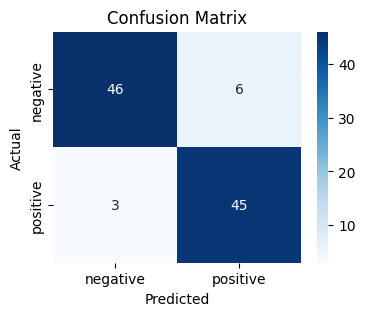

In [24]:
classifier = MultinomialNB()
classifier.fit(tfidf_train, y_train)

prediksi = classifier.predict(X_test_vec)
confus_mat = confusion_matrix(y_test, prediksi)
akurasi = accuracy_score(y_test, prediksi)
print(f'Accuracy: {akurasi}')
print(classification_report(y_test, prediksi))

plt.figure(figsize=(4, 3))
sns.heatmap(confus_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [25]:

def word2vec_embedding(text, model):
    tokens = word_tokenize(text)
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    text_vector = np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)
    return text_vector

sentences = [word_tokenize(text) for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

train_vectors = np.array([word2vec_embedding(text, word2vec_model) for text in X_train])
test_vectors = np.array([word2vec_embedding(text, word2vec_model) for text in X_test])



Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.51      0.67      0.58        52
    positive       0.47      0.31      0.38        48

    accuracy                           0.50       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.49      0.50      0.48       100



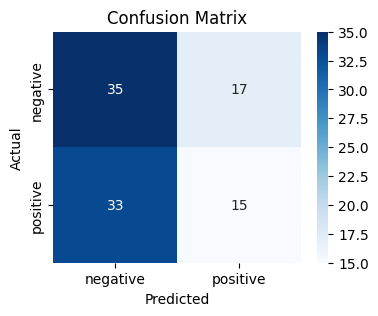

In [32]:
nb_classifier = GaussianNB()
nb_classifier.fit(train_vectors, y_train)

predictions = nb_classifier.predict(test_vectors)
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.76
              precision    recall  f1-score   support

    negative       0.80      0.71      0.76        52
    positive       0.72      0.81      0.76        48

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



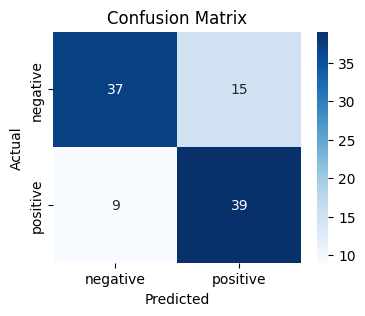

In [33]:
nb_classifier = GaussianNB()
nb_classifier.fit(tfidf_train.toarray(), y_train)

predictions = nb_classifier.predict(tfidf_test.toarray())
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))
plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

menyimpan algorit dan ekstraksi fitur terbaik ke dalam model

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(classifier, 'classifier_model.pkl')


['classifier_model.pkl']

In [37]:


tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
classifier = joblib.load('classifier_model.pkl')


data_baru = ["Pencuci muka ini memberikan hasil bersih yang memuaskan, teksturnya ringan dan mudah diratakan di wajah. Aromanya yang lembut memberikan sensasi kesegaran yang menyenangkan, dan kulit terasa lembut setelah penggunaan. Selain itu, formulanya cocok untuk berbagai jenis kulit, membuatnya menjadi pilihan yang baik untuk perawatan kulit sehari-hari."]
tfidf_data_baru = tfidf_vectorizer.transform(data_baru)


hasil_prediksi = classifier.predict(tfidf_data_baru)
print(hasil_prediksi)


['positive']
